In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson
import numpy as np
import random
fig, ax = plt.subplots(1, 1)
%matplotlib inline
import math
from scipy.stats import norm

In [20]:
df=pd.read_csv(r'D:\Reports\nvent\archive\results.csv')

In [21]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 9 columns):
date          42084 non-null object
home_team     42084 non-null object
away_team     42084 non-null object
home_score    42084 non-null int64
away_score    42084 non-null int64
tournament    42084 non-null object
city          42084 non-null object
country       42084 non-null object
neutral       42084 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [23]:
df.describe()

,home_score,away_score
count,42084.000000,42084.000000
mean,1.743632,1.186579
std,1.752441,1.403935
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [24]:
df["Total_Goals"]=df["home_score"]+df["away_score"]

In [25]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Total_Goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [26]:
df["Total_Goals"].describe()

count    42084.000000
mean         2.930211
std          2.090723
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         31.000000
Name: Total_Goals, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


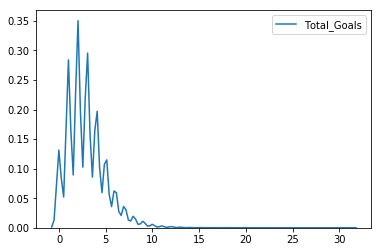

In [57]:
poisson.pmf

In [44]:
mn=df["Total_Goals"].mean()
print(mn)
df["Total_Goals"].describe()

2.930211006558312


count    42084.000000
mean         2.930211
std          2.090723
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         31.000000
Name: Total_Goals, dtype: float64

# Poisson distribution formula= e^(-mu)*(mu)^k/(k!)

In [94]:
poisson.pmf(0, mn, loc=0)

0.053385772208589075

(array([0.6, 0. , 0.4, 0. , 0.6, 0. , 0.2, 0. , 0. , 0.2]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

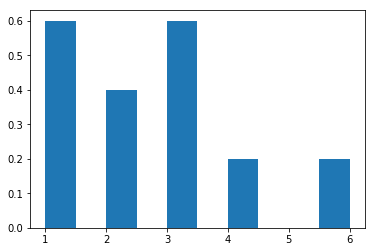

In [50]:
plt.hist(s,density=True)

In [100]:
k=[x for x in range(0,10,1)]
pmf=[poisson.pmf(k[i], mn, loc=0) for i in range(len(k))]

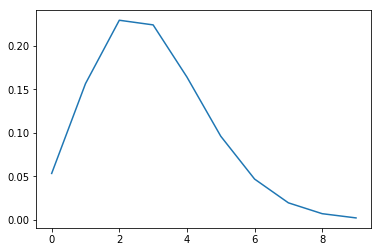

In [103]:
plt.plot(k,pmf)

In [124]:
#Alternate Model

# If mean becomes sufficiently large then poisson distribution can be a normal distribution.
# Assume a hypothetical game where we can score goal points in real values. Let 7.5 be the mean goal and lets generate random goal scores
# for 1000 matches.

am=[]
for x in range(0,1000):
    
    n=random.normalvariate(7.5,3) #Generating data for normal distribution with 7.5 as the mean goal and 3 as standard distribution
    if n>0:
        am.append(n)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


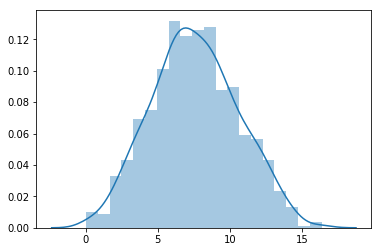

In [126]:
sns.distplot(am)